<a href="https://colab.research.google.com/github/Jxiang2/CMPUT340_ScientificComputation/blob/main/CMPUT340_interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import matplotlib.pyplot as plt

X1 = [-6.28318531, -5.62179738,  -4.96040945,  -4.29902153,  -3.6376336,   -2.97624567,   -2.31485774,  -1.65346982,  -0.99208189,  -0.33069396,   0.33069396,   0.99208189,    1.65346982,   2.31485774,   2.97624567,   3.6376336,    4.29902153,   4.96040945,    5.62179738,   6.28318531]
Y1 = [-0.02212373,   0.68087378,   0.93174316,   0.93548568,   0.44657927,  -0.16281821,   -0.71237743,  -0.94524065,  -0.87719887,  -0.37732703,   0.35844402,   0.8994329,    0.95673157,   0.6759106,    0.15797694,  -0.49044645,  -0.92443154,  -0.97354381,   -0.65275084,   0.10165245]
X2 = [-5.,          -4.79591837,  -4.59183673,  -4.3877551,   -4.18367347,  -3.97959184,   -3.7755102,   -3.57142857,  -3.36734694,  -3.16326531,  -2.95918367,  -2.75510204,   -2.55102041,  -2.34693878,  -2.14285714,  -1.93877551,  -1.73469388,  -1.53061224,   -1.32653061,  -1.12244898,  -0.91836735,  -0.71428571,  -0.51020408,  -0.30612245,   -0.10204082,   0.10204082,   0.30612245,   0.51020408,   0.71428571,   0.91836735,    1.12244898,   1.32653061,   1.53061224,   1.73469388,   1.93877551,   2.14285714,    2.34693878,   2.55102041,   2.75510204,   2.95918367,   3.16326531,   3.36734694,    3.57142857,   3.7755102,    3.97959184,   4.18367347,   4.3877551,    4.59183673,    4.79591837,   5.        ]
Y2 = [ 1.51657986e+01,   1.18834486e+01,   1.14908377e+01,   9.69999012e+00,    8.83752995e+00,   8.53654378e+00,   7.26220222e+00,   6.24526603e+00,    6.14466521e+00,   2.20438691e+00,   3.02257790e+00,   2.55301601e+00,    1.20314417e+00,   2.81993279e+00,  -7.95772374e-02,   5.17986596e-01,   -2.02214422e+00,  -1.88483645e+00,  -6.00919079e-01,  -1.89204707e-01,    1.69449681e-02,   3.91334228e-01,  -1.73970249e+00,  -3.19757434e-01,   -6.00188224e-01,   2.31330343e-01,   5.82638717e-01,   4.22184971e+00,    3.59292410e-01,   4.59202652e+00,   4.71769806e+00,   5.21676309e+00,    6.70631069e+00,   6.62448237e+00,   7.35495405e+00,   9.65171985e+00,    9.61038903e+00,   1.22648215e+01,   1.29301284e+01,   1.33289427e+01,    1.76286428e+01,   1.76382160e+01,  2.07450785e+01,   2.18295969e+01,    2.30767522e+01,   2.64519126e+01,   2.74412541e+01,   2.89516763e+01,    3.31531920e+01,   3.70987315e+01]

Question1.(a)

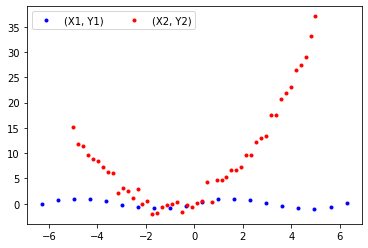

In [10]:
fig, ax = plt.subplots()

ax.plot(X1, Y1, 'b.', label='(X1, Y1)')
ax.plot(X2, Y2, 'r.', label = '(X2, Y2)')
ax.legend(loc='upper left', ncol=2)
plt.show()

#There is very little noise for the dataset (X1, Y1), so all data points are significant. 
#Interpolation can match all the significant datapoints, so it is a better approach to describe the dataset.

#There are some noises in the dataset (X2,Y2), so interpolation will capture the noises which are not desirable. 
#Approximation can be a better apporach since it will recover the function used to generate the data, despite the noise.

Question1.(b)

In [22]:
def f(x, m, c):
  return sum([c[k]*x**k for k in range(0,m)])

[-1.36905353e-02  1.14187195e+00  4.07466901e-02 -2.70755791e-01
 -1.74696932e-02  1.63259969e-02  1.46454529e-03  5.88176626e-03
  3.08770151e-04 -1.67344402e-03 -6.97951910e-05  1.91208176e-04
  5.59116661e-06 -1.16181889e-05 -2.20579153e-07  3.90677894e-07
  4.28369247e-09 -6.83414632e-09 -3.26120360e-11  4.83795886e-11]


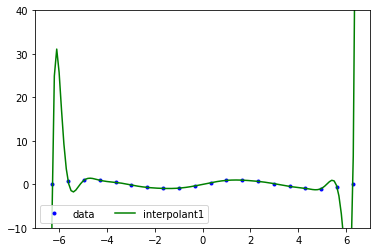

In [23]:
m1 = len(X1)

#print(m1)
V1 = np.vander(X1, increasing=True)
c1 = np.linalg.solve(V1, Y1)
print(c1)

fig, ax = plt.subplots()
ax.plot(X1, Y1, 'b.', label='data')

x1 = np.arange(-7, 7, 0.1)
ax.plot(x1, f(x1, m1, c1), 'g', label="interpolant1")

plt.axis([-7,7, -10, 40])
ax.legend(loc='lower left', ncol=2)
plt.show()

#The interpolation for dataset(X1, Y1) matches the data points because the size of the dataset is not very large. 
#So the vandermonde's matrix is not very ill-conditioned and the linear system Vc1 = Y1 yeilds a relatively accurate solution for the coiefficients of the interpolant.


50
[ 2.52040997e+00  3.24340024e+00  9.00050932e+00  4.10776665e+01
 -6.05714803e+01 -2.41100627e+02  1.68564932e+02  6.47858802e+02
 -2.06334485e+02 -9.60130725e+02  1.10507694e+02  8.82872756e+02
  2.39482989e+00 -5.43648019e+02 -4.09407798e+01  2.35453449e+02
  2.87881519e+01 -7.40090527e+01 -1.14192818e+01  1.72057146e+01
  3.06074074e+00 -2.98422636e+00 -5.89316962e-01  3.85366489e-01
  8.35328617e-02 -3.64203489e-02 -8.75375666e-03  2.40272892e-03
  6.68324679e-04 -9.60763954e-05 -3.56083696e-05  8.24610095e-07
  1.19174828e-06  1.47349577e-07 -1.87602074e-08 -8.80761016e-09
  2.32936416e-10  2.16254495e-10 -5.61905530e-11 -3.78438993e-12
  5.04367752e-12  3.00878424e-13 -2.21953820e-13 -2.02008670e-14
  5.55089914e-15  6.70820227e-16 -7.64517899e-17 -1.11884249e-17
  4.54287546e-19  7.62919270e-20]


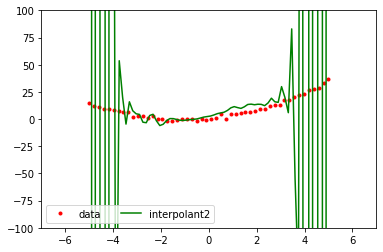

In [24]:
m2 = len(X2)

print(m2)
V2 = np.vander(X2, increasing=True)
c2 = np.linalg.solve(V2, Y2)
print(c2)

fig, ax = plt.subplots()
ax.plot(X2, Y2, 'r.', label='data')

x2 = np.linspace(-7, 7, 100)
ax.plot(x2, f(x2, m2, c2), 'g', label="interpolant2")

plt.axis([-7,7, -100, 100])
ax.legend(loc='lower left', ncol=2)
plt.show()

#The interpolation for dataset(X2, Y2) only matches some points because the size of the dataset is sufficiently large. 
#So the vandermonde's matrix is ill-condtioned and the linear system Vc2 = Y2 yeilds inaccurate coifficients for the interponent.

Question1.(c)

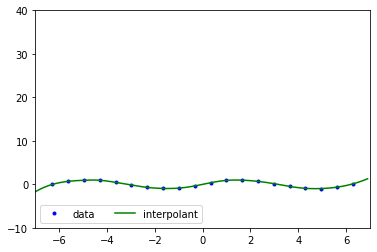

In [25]:
from scipy.interpolate import CubicSpline
cs = CubicSpline(X1, Y1)
xs = np.arange(-7, 7, 0.1)
fig, ax = plt.subplots()
ax.plot(X1, Y1, 'b.', label='data')

ax.plot(xs, cs(xs), 'g', label="interpolant")

plt.axis([-7,7, -10, 40])
ax.legend(loc='lower left', ncol=2)
plt.show()

#Piecewise interpolation is used to achieve a better interpolant for dataset(X1, Y1). No wiggles in the interpolant now.

Question1.(d)

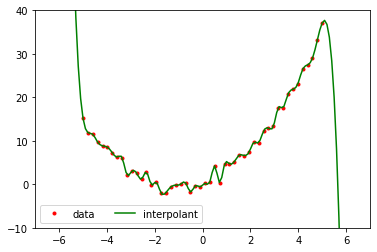

In [26]:
from scipy.interpolate import CubicSpline
cs = CubicSpline(X2, Y2)
xs = np.arange(-7, 7, 0.1)
fig, ax = plt.subplots()
ax.plot(X2, Y2, 'r.', label='data')

ax.plot(xs, cs(xs), 'g', label="interpolant")

plt.axis([-7,7, -10, 40])
ax.legend(loc='lower left', ncol=2)
plt.show()

#Piecewise interpolation is used to achieve a better interpolant.
#Now the interpolant matches the datapoints of the dataset(X2, Y2) accurately.